## Business Understanding

College enrollment are slowly declining throughout the United States. College's can use this classification model to show potential students how more likely they are to make more than 50K a year if they pursue a college education. They can show that the median income in the United States currently of High School graduates that do not go to college falls around 40K.

We hope to gain or give educational institutions a tool that provides them leverage to show with certain criteria such as education and employment to project if someone can earn more than 50K a year in income. 

We are prioritizing a classification metric shown with Decision Trees and Random Forest models because they are very easy to understand and can handle both numerical and categorical data.

### Draw backs of Decision Trees & Random Forest

-Very feature driven, a small change in data can through a very different result

-Can be large so will need pruning

-Can give lower accuracy numbers compared to other algorithms

## Data Understanding



We will be using an [income](https://www.kaggle.com/datasets/mastmustu/income) dataset that tries to predict with attributes given if you are likely to make over 50K a year in income. This is a fairly small dataset with almost 40K row and not many missing values. There will not be a lot of preprocessing of the dataset. 

Attribute Information used for models:
 - Target Variable: Income >50K
 - education: Highest level of education individual achieved
 - occupation: Current work position
 - race
 - gender: Male or Female
 - relationship: If individual is a husband, wife, single, etc.
 - Hours worked per week


In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df = pd.read_csv("train.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39429 entries, 0 to 39428
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39429 non-null  int64 
 1   workclass        37176 non-null  object
 2   fnlwgt           39429 non-null  int64 
 3   education        39429 non-null  object
 4   educational-num  39429 non-null  int64 
 5   marital-status   39429 non-null  object
 6   occupation       37168 non-null  object
 7   relationship     39429 non-null  object
 8   race             39429 non-null  object
 9   gender           39429 non-null  object
 10  capital-gain     39429 non-null  int64 
 11  capital-loss     39429 non-null  int64 
 12  hours-per-week   39429 non-null  int64 
 13  native-country   39429 non-null  object
 14  income_>50K      39429 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.5+ MB


Observation of data:
 - Missing values in age, workclass, and occupation
 - Will remove unnecessary columns( 'age','fnlwgt','educational-num',
                                  'capital-gain','capital-loss',
                                  'workclass','native-country',
                                  'marital-status)
 - Target variable is income_>50K 

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [5]:
df['income_>50K'].value_counts()

0    29788
1     9641
Name: income_>50K, dtype: int64

### Class imbalance 

 - Many more people make less than 50K a year

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,39429.000000,3.942900e+04,39429.000000,39429.000000,39429.000000,39429.000000,39429.000000
mean,38.678308,1.870666e+05,10.169748,1105.570240,89.543103,40.426387,0.244515
std,13.822934,1.053610e+05,2.396148,7582.217219,407.166859,12.477747,0.429805
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.155110e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.764580e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.343860e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
df.fillna(value='missing', inplace=True)

C:\Users\albetorres\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Individuals counted')

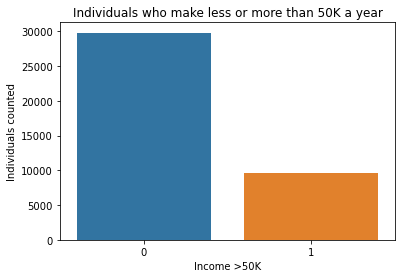

In [8]:

sns.countplot(df['income_>50K'])
plt.title("Individuals who make less or more than 50K a year")
plt.xlabel("Income >50K")
plt.ylabel("Individuals counted")


Copying data frame to keep original one untouched

In [9]:
Df2 = df



In [10]:
Df2 = Df2.drop(['age','fnlwgt','educational-num',
          'capital-gain','capital-loss','workclass','native-country','marital-status'], axis=1)

In [11]:
Df3 = Df2[Df2['income_>50K'] == 0]

In [12]:
Df2 = Df2[Df2['income_>50K'] == 1]

In [13]:
Df2.head()

,education,occupation,relationship,race,gender,hours-per-week,income_>50K
0,Doctorate,Exec-managerial,Not-in-family,White,Male,60,1
2,Bachelors,Exec-managerial,Husband,White,Male,40,1
8,HS-grad,Exec-managerial,Husband,White,Male,45,1
15,HS-grad,Exec-managerial,Husband,White,Male,40,1
17,Doctorate,Prof-specialty,Husband,White,Male,50,1


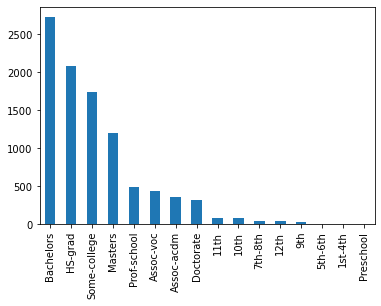

In [14]:
ax = Df2["education"].value_counts().plot(kind='bar')
plt.show()

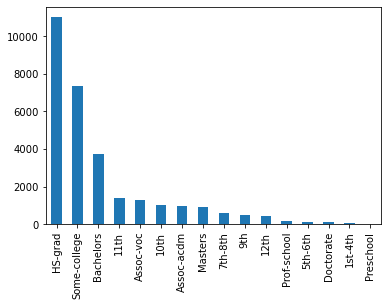

In [15]:
ax = Df3["education"].value_counts().plot(kind='bar')
plt.show()

## Decision Tree

### Data preparation 

In [16]:
#Dropping columns that will not be needed for accurate model
X = df.drop(['age','fnlwgt','income_>50K','educational-num','capital-gain','capital-loss',
             'workclass','native-country','marital-status'], axis=1) 

y = df[['income_>50K']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

One hot encoding after test train split to avoid 
data leakage

In [17]:
ohe = OneHotEncoder(handle_unknown='ignore')
# fitting and transforming only classification columns that I am using
ohe.fit(X_train[['education', 'occupation', 'race', 'gender','relationship']])
X_train_ohe = ohe.transform(X_train[['education', 'occupation', 'race', 'gender','relationship']]).toarray()

ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train[['education', 'occupation', 'race', 'gender','relationship']].columns))

ohe_df.head()

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,...,race_Other,race_White,gender_Female,gender_Male,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
#Reset index to keep rows in order
X_train = X_train.reset_index()

In [19]:
#Adding back numerical columns after one hot encoding
ohe_df['hours-per-week'] = X_train['hours-per-week']


In [20]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

clf.fit(ohe_df, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

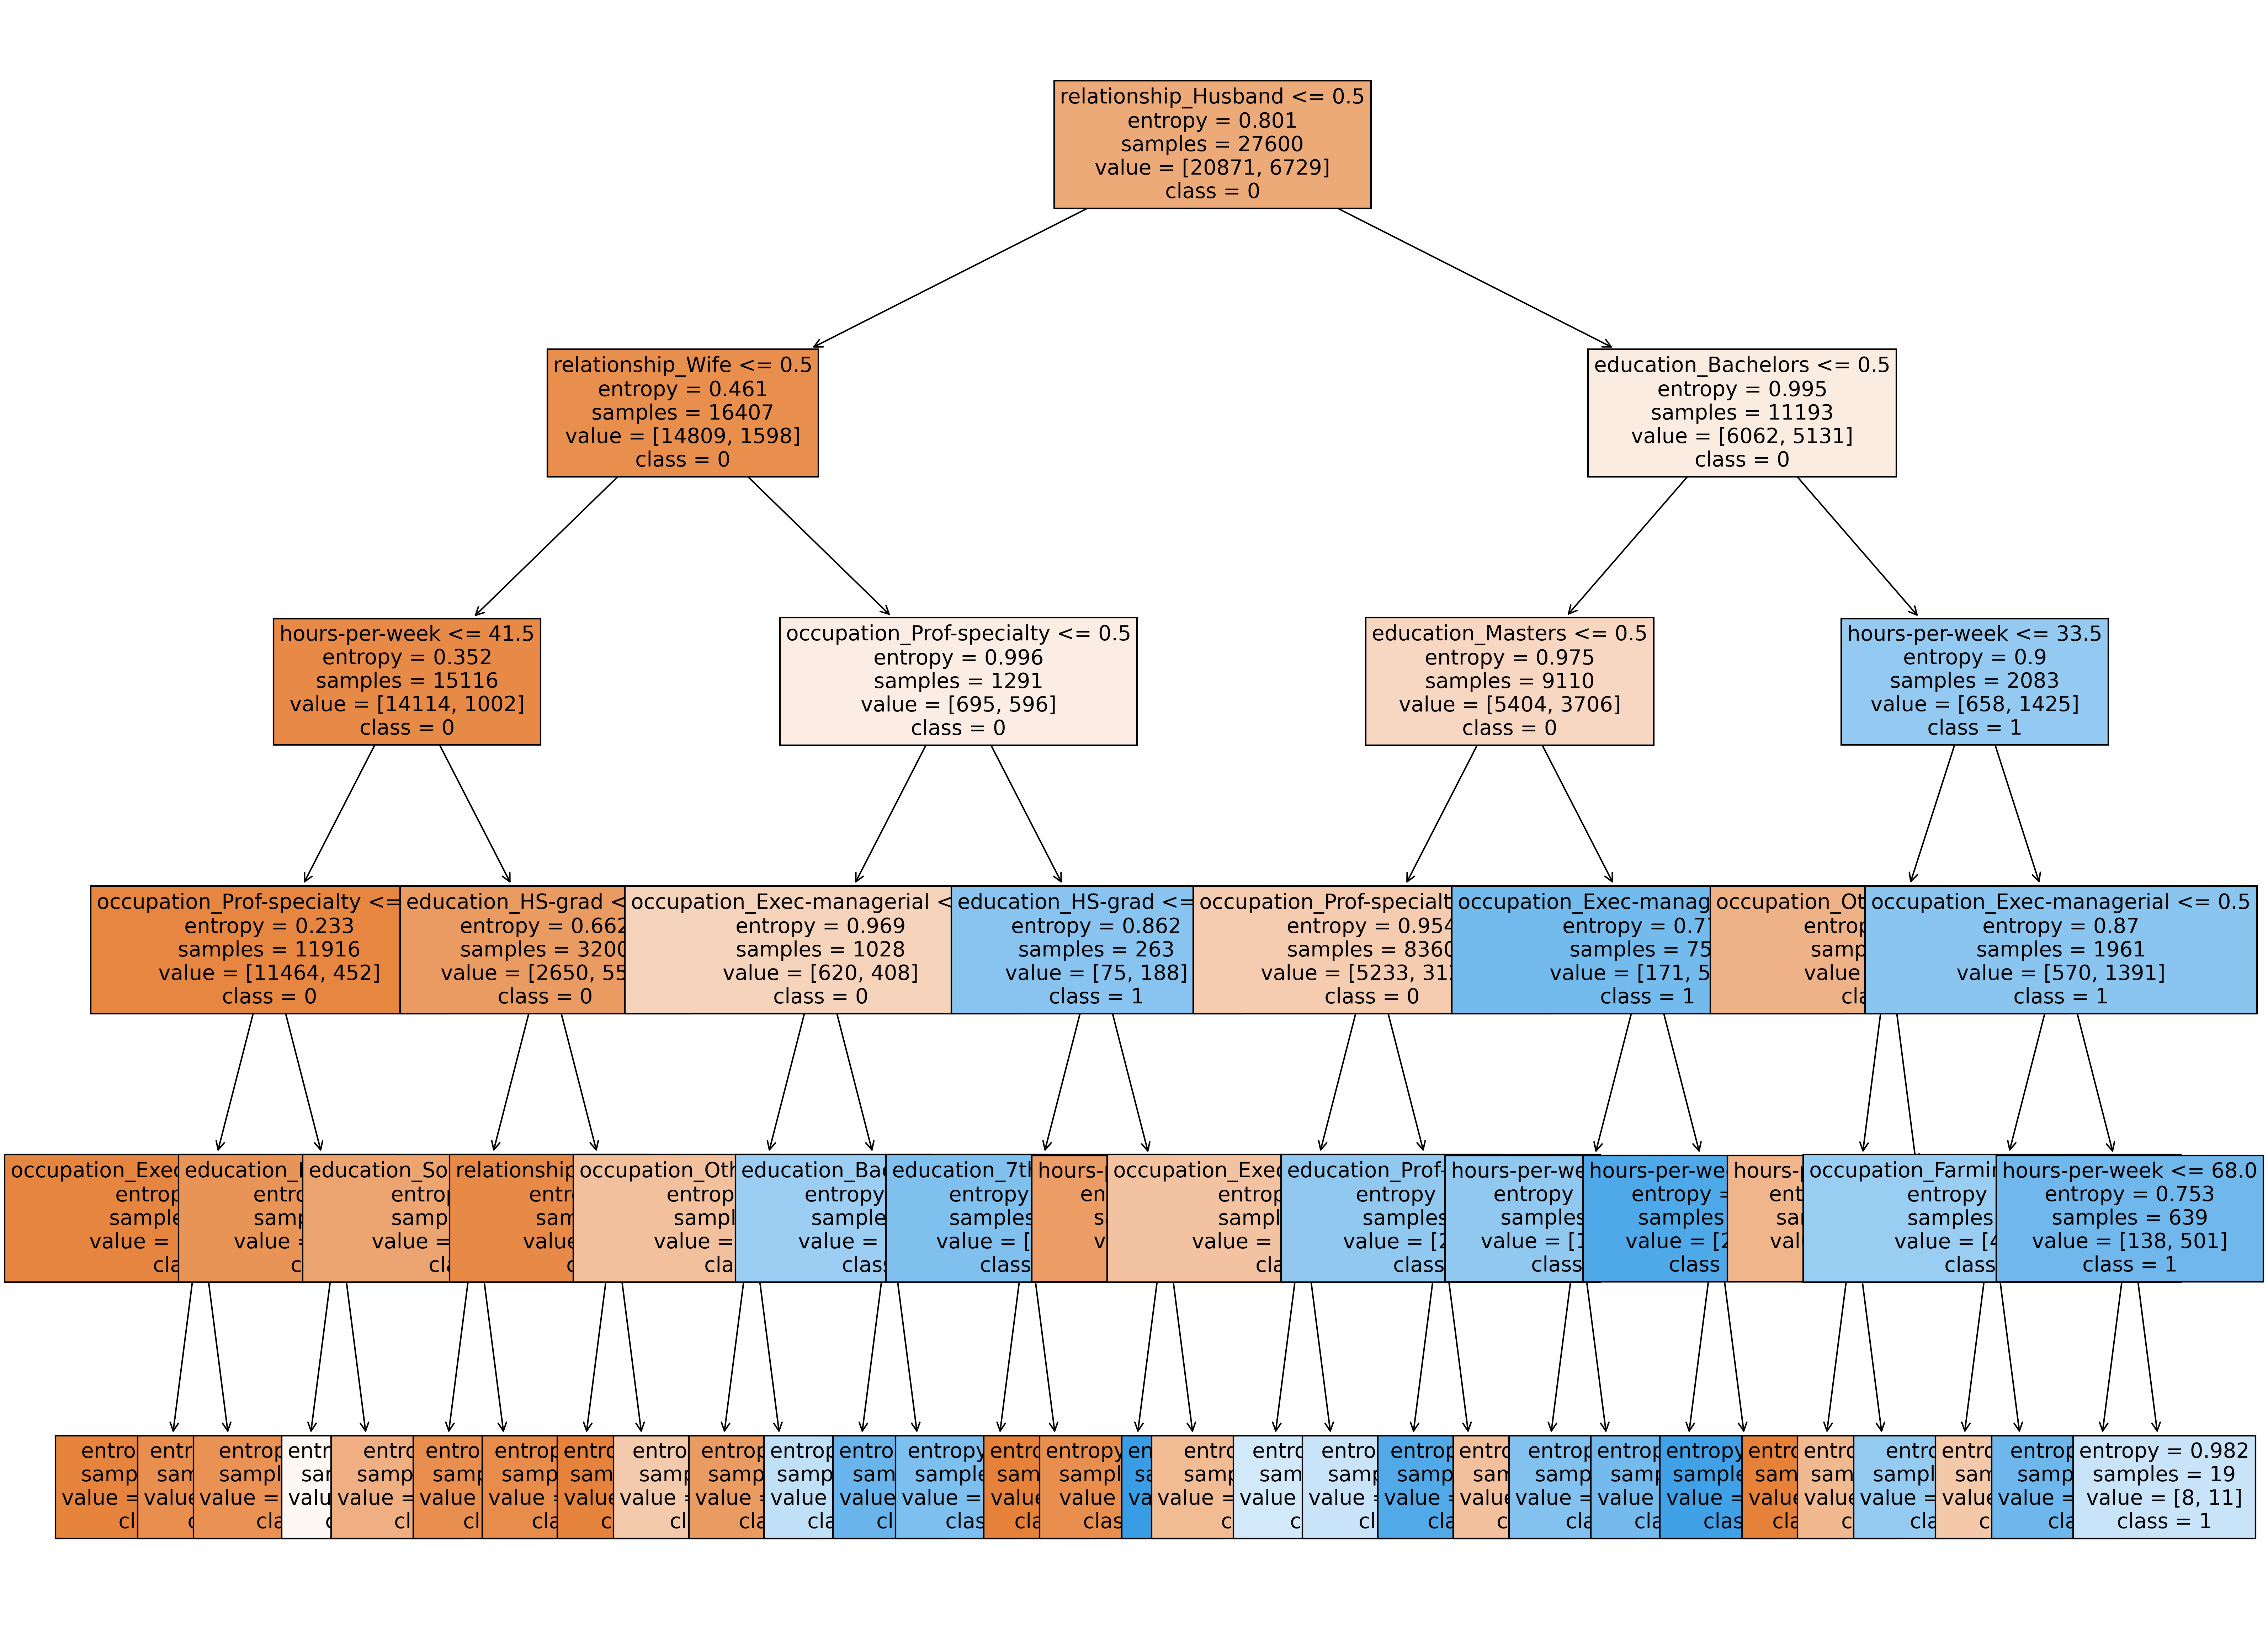

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (25,20), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True,
              fontsize=14)
plt.show()

In [22]:
X_test = X_test.reset_index()

X_test_ohe = ohe.transform(X_test[['education', 'occupation', 'race', 'gender','relationship']]).toarray()
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(X_test[['education', 'occupation', 'race', 
                                                                               'gender','relationship']].columns))
# X_test_ohe_df['age'] = X_test['age']
X_test_ohe_df['hours-per-week'] = X_test['hours-per-week']

y_preds = clf.predict(X_test_ohe_df)
# y_train_preds = clf.predict(X_train_ohe)

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
# print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_train, y_train_preds) * 100))
# print('----------------------------------------------------------------------')
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_preds) * 100))
print('Precision Score: ', precision_score(y_test, y_preds))
print(clf.score(ohe_df, y_train))


print('Classification Report: ', classification_report(y_test, y_preds, target_names=['under 50k', 'over 50k']))

Testing Accuracy for Decision Tree Classifier: 82.48%
Precision Score:  0.7086026852312283
0.8227173913043478
Classification Report:                precision    recall  f1-score   support

   under 50k       0.85      0.93      0.89      8917
    over 50k       0.71      0.49      0.58      2912

    accuracy                           0.82     11829
   macro avg       0.78      0.71      0.73     11829
weighted avg       0.81      0.82      0.81     11829



### Decision Tree GridSearch

In [24]:
para_grid = {'criterion':['gini','entropy'],
             'max_depth':[3,6,9,12],
            'min_samples_leaf':[5,10]}

In [25]:
decision = DecisionTreeClassifier(class_weight = 'balanced')
grid_clf = GridSearchCV(decision, para_grid, cv = 5, scoring = 'accuracy')
grid_clf.fit(ohe_df, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'min_samples_leaf': [5, 10]},
             scoring='accuracy')

In [26]:
grid_clf.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5}

In [27]:
y_preds_clf_grid = grid_clf.predict(X_test_ohe_df)

In [28]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_preds_clf_grid) * 100))
display(confusion_matrix(y_test, y_preds_clf_grid))
print(classification_report(y_test,y_preds_clf_grid))

Testing Accuracy for Decision Tree Classifier: 76.24%


array([[6648, 2269],
       [ 542, 2370]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      8917
           1       0.51      0.81      0.63      2912

    accuracy                           0.76     11829
   macro avg       0.72      0.78      0.73     11829
weighted avg       0.82      0.76      0.78     11829



## Random Forest

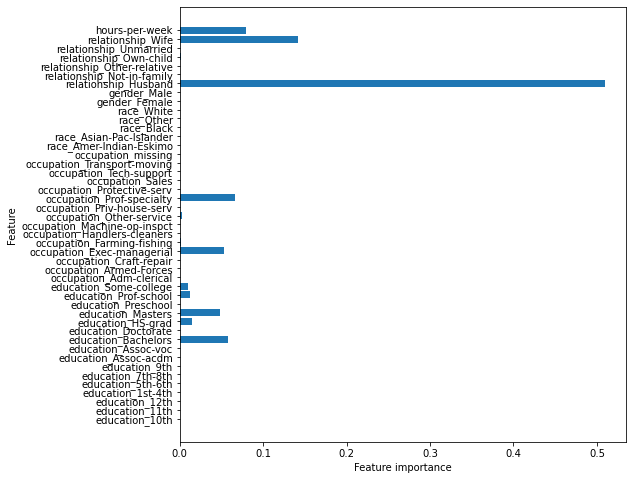

In [29]:
def plot_feature_importances(model):
    n_features = ohe_df.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), ohe_df.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [30]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, max_depth= 8, class_weight = 'balanced')
forest.fit(ohe_df, y_train)

C:\Users\albetorres\AppData\Local\Temp\ipykernel_8924\3626193439.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(ohe_df, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200)

In [31]:
forest_preds = forest.predict(X_test_ohe_df)

In [32]:
# Training accuracy score
forest.score(ohe_df, y_train)

0.748840579710145

In [33]:
# Test accuracy score
forest.score(X_test_ohe_df, y_test)

0.7460478485079043

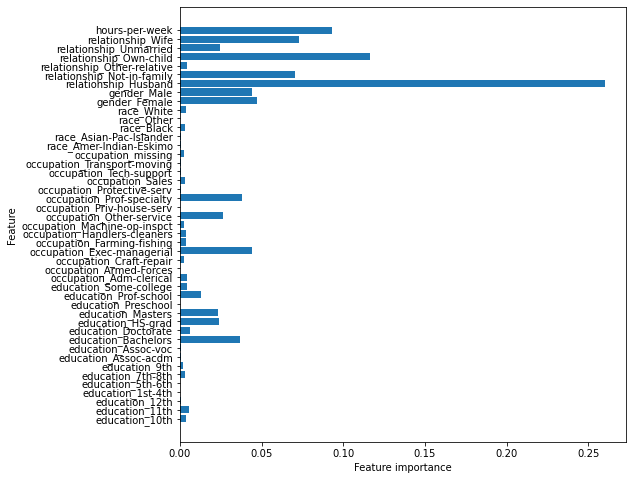

In [34]:
plot_feature_importances(forest)

In [35]:


print("Testing Accuracy for Random Forest Tree Classifier: {:.4}%".format(accuracy_score(y_test, forest_preds) * 100))

print('Precision Score: ', precision_score(y_test, forest_preds))

print('Classification Report: ', classification_report(y_test, forest_preds, target_names=['under 50k', 'over 50k']))

Testing Accuracy for Random Forest Tree Classifier: 74.6%
Precision Score:  0.49102263856362216
Classification Report:                precision    recall  f1-score   support

   under 50k       0.94      0.71      0.81      8917
    over 50k       0.49      0.86      0.63      2912

    accuracy                           0.75     11829
   macro avg       0.72      0.79      0.72     11829
weighted avg       0.83      0.75      0.76     11829



### Random Forest GridSearch

In [36]:
para_grid = {'criterion':['gini','entropy'],
             'max_depth':[3,6,9,12],
            'min_samples_leaf':[5,10]}

In [37]:
forest = RandomForestClassifier(class_weight = 'balanced')
grid_rfc = GridSearchCV(forest, para_grid, cv = 5, scoring = 'accuracy')
grid_rfc.fit(ohe_df, y_train)

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: 

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: 

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: 

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'min_samples_leaf': [5, 10]},
             scoring='accuracy')

In [38]:
grid_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5}

In [39]:
y_preds_grid = grid_rfc.predict(X_test_ohe_df)

In [40]:
print("Testing Accuracy for Random Forest Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_preds_grid) * 100))
display(confusion_matrix(y_test, y_preds_grid))
print(classification_report(y_test,y_preds_grid))

Testing Accuracy for Random Forest Tree Classifier: 76.08%


array([[6495, 2422],
       [ 408, 2504]], dtype=int64)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      8917
           1       0.51      0.86      0.64      2912

    accuracy                           0.76     11829
   macro avg       0.72      0.79      0.73     11829
weighted avg       0.83      0.76      0.78     11829



## Evaluation

 - The Random Forest Tree by far is the most accurate in picking whether someone is making more than 50K or not. The over accuracy of the model is at 76.36%, but the recall after the grid search is at 85% accuracy on predicting if someone makes over 50K a year and 74% in predicting if someone makes less than 50K a year. 